In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [69]:
profiles = pd.read_csv("CSV Files/customer_profiles.csv")
details = pd.read_csv("CSV Files/ad_details.csv")
events = pd.read_csv("CSV Files/ad_events.csv")

In [70]:
events = events.drop_duplicates(subset='customer', keep='first')

df = pd.merge(profiles, events, left_on='id', right_on='customer', how='outer')

df = df.drop('id', axis=1)

df.insert(0, 'id', df.pop('customer'))

df = df.fillna(df.median())

In [71]:
# for col in df.drop(['id'], axis=1).columns:
#     if df[col].dtype == object:
#         le = LabelEncoder()
#         df[col] = le.fit_transform(df[col])

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'home_state', 'event', 'event_info'])

In [72]:
times = pd.to_datetime(df['became_member_on (year month day)'], format='%Y%m%d')

In [73]:
years = []
months = []
days = []
for time in times:
    years.append(time.year)
    months.append(time.month)
    days.append(time.day)

In [47]:
df["day"] = days
df["month"] = months
df["year"] = years

In [48]:
df = df.drop('became_member_on (year month day)', axis=1)

In [49]:
scaler = StandardScaler()
data = scaler.fit_transform(df.drop(['id'], axis=1))
data = pd.DataFrame(data)

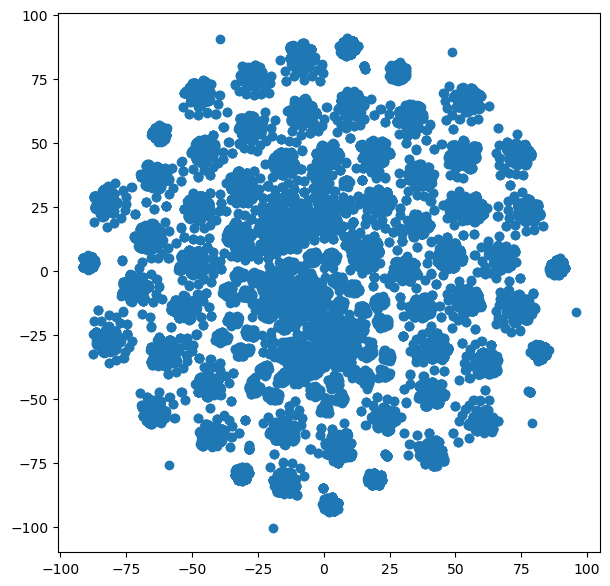

In [50]:
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(data)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

In [51]:
error = []
for n_clusters in range(1, 16):
    model = KMeans(init='k-means++',n_clusters=n_clusters,max_iter=1000,random_state=0)
    model.fit(tsne_data)
    error.append(model.inertia_)

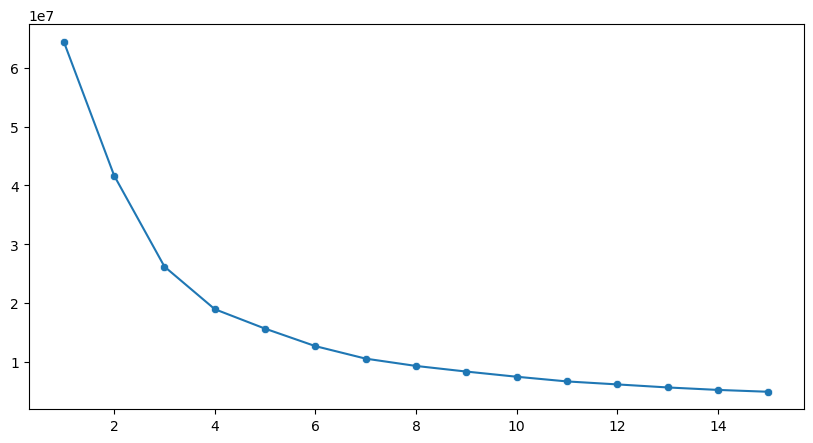

In [52]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 16), y=error)
sns.scatterplot(x=range(1, 16), y=error)
plt.show()

In [59]:
model = KMeans(init='k-means++', n_clusters=4)
segments = model.fit_predict(tsne_data)

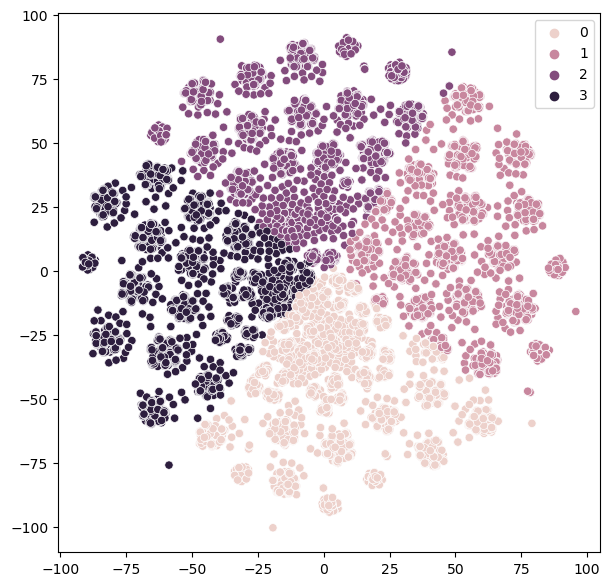

In [60]:
plt.figure(figsize=(7, 7))
sns.scatterplot(tsne_data[:, 0], tsne_data[:, 1], hue=segments)
plt.show()

In [61]:
labels = model.labels_

In [62]:
sc = metrics.silhouette_score(tsne_data, labels)
print("Silhouette Coefficient:%0.4f" % sc)

Silhouette Coefficient:0.3569


In [74]:
cluster_labels = model.labels_

# Add cluster labels to the original DataFrame
df['cluster'] = cluster_labels

# Group by cluster labels
cluster_groups = df.groupby('cluster')

# Get the mode of each feature within each cluster
cluster_features = cluster_groups.apply(lambda x: x.mode().iloc[0])

# Drop irrelevant columns
cluster_features = cluster_features.drop(['id', 'cluster'], axis=1)

# Print the features shared by each cluster
for i, cluster in cluster_features.iterrows():
    print(f"\nCluster {i+1} Features:")
    print(cluster)



Cluster 1 Features:
0
age                                                                  55.0
became_member_on (year month day)                              20170802.0
income                                                            64000.0
kids                                                                  2.0
time                                                                  0.0
                                                                  ...    
event_info_{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}           0.0
event_info_{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}           0.0
event_info_{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}           0.0
event_info_{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}           0.0
event_info_{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}           0.0
Name: 0, Length: 1753, dtype: float64

Cluster 2 Features:
0
age                                                                  55.0
became_member_on (year month